In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Nepali_Dataset_New.csv',encoding ='utf-8')

In [3]:
df.head()

News       Category
0  \n﻿काठमाण्डौ, ६ असार । नेपाल ललितकला प्रज्ञा प...       politics
1  नेपालको आशा जीवितैकप्तान पारस खड्काले ब्याट र ...          sport
2  \n﻿राजविराज, २६ फागुन । नेकपा एमालेलाई औद्योगि...       politics
3  सामाजिक कार्यका लागि सुन्दरी"\nसौन्दर्य प्रतिय...  entertainment
4  खराब प्रदर्शनपछि प्रशिक्षण पिच"महिला राष्ट्रिय...          sport

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4540 entries, 0 to 4539
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   News      4540 non-null   object
 1   Category  4540 non-null   object
dtypes: object(2)
memory usage: 71.1+ KB


In [5]:
df.isna().sum()

News        0
Category    0
dtype: int64

In [6]:
df.duplicated().sum()

4

In [7]:
df=df.drop_duplicates()
df.reset_index(drop=True, inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df['Category'].unique()

array(['politics', 'sport', 'entertainment', 'tech', 'business'],
      dtype=object)

In [10]:
y= df['Category']

In [11]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

print("Categories before label encoding in y:")
print(set(y))

# Encode the categorical labels into numerical format
y = label_encoder.fit_transform(y)

print("Categories after label encoding in y:")
print(set(y))

Categories before label encoding in y:
{'business', 'politics', 'entertainment', 'tech', 'sport'}
Categories after label encoding in y:
{0, 1, 2, 3, 4}


In [12]:
import re
 
def clean_text(string):
    if isinstance(string, str):
        clean_text = re.sub(r'[\n,|।\'":]', '', string)
        return clean_text
    else:
        return string # Return the input unchanged if it's not a string

In [13]:
df['News'] = df['News'].apply(clean_text)

In [14]:
import snowballstemmer
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Assuming 'nepali' has stop words list
stop_words = set(stopwords.words('nepali'))  

# Create an instance of the Stem class
# stemmer = Stem()
stemmer = snowballstemmer.NepaliStemmer()

def tokenize_and_stem(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stop_words]
        stemmed = stemmer.stemWords(tokens)

        return ' '.join(stemmed)
    else:
        return []

# Applying the tokenization and stemming function to each element in DataFrame 'X'
X = df['News'].apply(lambda x: tokenize_and_stem(x))

In [15]:
print(stop_words)

{'जस्तोसुकै', 'तीन', 'गर्न', 'हुन', 'बारे', 'जसबाट', 'जान', 'गर्छु', 'पर्याप्त', 'समय', 'जुन', 'जसलाई', 'म', 'कि', 'ती', 'बीचमा', 'दिनुभएको', 'जबकि', 'धेरै', 'आफूलाई', 'नयाँ', 'को', 'आफ्नै', 'यसो', 'फेरी', 'निर्दिष्ट', 'हुन्', 'जसमा', 'किनभने', 'प्लस', 'पाँचौं', 'लाई', 'गरेर', 'चाहन्छु', 'सोही', 'अनुसार', 'छन्', 'उदाहरण', 'जस्तो', 'निम्न', 'भित्र', 'तपाईको', 'यदि', 'वरीपरी', 'गर्ने', 'बने', 'अन्यत्र', 'कुनै', 'यो', 'आफू', 'रूप', 'पहिलो', 'जो', 'गरेको', 'गैर', 'कतै', 'भन्', 'सही', 'गर्नुपर्छ', 'देखिन्छ', 'दिए', 'यति', 'राख्छ', 'देखेको', 'रहेको', 'जहाँ', 'तदनुसार', 'बिरुद्ध', 'अक्सर', 'नत्र', 'देखेर', 'गरी', 'आए', 'कुरा', 'गरेका', 'अन्य', 'तिनिहरुलाई', 'एक', 'तत्काल', 'यथोचित', 'चार', 'तिनी', 'उनको', 'मात्र', 'चाहिए', 'हरे', 'हुन्छ', 'ठीक', 'गर्नु', 'राम्रो', 'सम्भव', 'बाहेक', 'पछिल्लो', 'सबै', 'वास्तवमा', 'आदि', 'नजिकै', 'पक्कै', 'दुई', 'पूर्व', 'जाहिर', 'तिमी', 'सधै', 'राखे', 'जस्तै', 'त', 'उनले', 'छौं', 'सट्टा', 'तल', 'मुख्य', 'सात', 'साथ', 'यसको', 'हुने', 'औं', 'कम से कम', 'के', 'अर्

In [16]:
X.head()

0    ﻿काठमाण्डौ ६ असार नेपाल ललितकला प्रज्ञा प्रतिष...
1    नेपाल आशा जीवितैकप्तान पारस खड्का ब्याट शक्ति ...
2    ﻿राजविराज २६ फागुन नेकपा एमाले औद्योगिक क्षेत्...
3    सामाजिक कार्य सुन्दरीसौन्दर्य प्रतियोगिता दौड ...
4    खराब प्रदर्शन प्रशिक्षण पिचमहिला राष्ट्रिय यू ...
Name: News, dtype: object

In [17]:
X.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4536 entries, 0 to 4535
Series name: News
Non-Null Count  Dtype 
--------------  ----- 
4536 non-null   object
dtypes: object(1)
memory usage: 35.6+ KB


In [23]:
vocab_size=50000
max_len=200

In [24]:
# Tokenization and vectorization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
word_index = tokenizer.word_index
print("Number of unique tokens:", len(word_index))

sequences = tokenizer.texts_to_sequences(X)
max_length = max(len(seq) for seq in sequences)
print('max_length: ', max_length)
padded_sequences = pad_sequences(sequences, maxlen=max_len, truncating='post')

Number of unique tokens: 71157
max_length:  2774


In [25]:
padded_sequences


array([[    0,     0,     0, ...,    26,   920,  1751],
       [    2,   777, 34388, ...,   468,   189,  1489],
       [    0,     0,     0, ..., 24315, 34402,  1075],
       ...,
       [  210,  5156,  7768, ...,    34,   210,    33],
       [    0,     0,     0, ...,  2671,   257,   142],
       [  561,    41,   194, ...,   194,   899,   131]])

In [26]:
# corpus=[]

In [27]:
# for i in range(0,len(X)):
#     review = re.sub(r'[\n,|।\'":]', ' ', X['News'][i])
#     stop_words = set(stopwords.words('nepali'))
#     review= [word for word in word_tokenize(review) if word not in stop_words]
#     review = ' '.join(review)
#     corpus.append(review)

In [28]:
# corpus

In [23]:
# from tensorflow.keras.preprocessing.text import one_hot
# onehot_repr = [one_hot(words,voc_size)for words in corpus]
# onehot_repr

[[3170,
  5795,
  3946,
  7203,
  8600,
  605,
  605,
  811,
  1842,
  2314,
  9147,
  9542,
  4710,
  605,
  4589,
  7889,
  9761,
  767,
  4050,
  5500,
  3876,
  6084,
  3586,
  1629,
  7022,
  811,
  8243,
  4050,
  8600,
  9147,
  2314,
  4147,
  7203,
  9844,
  6248,
  5500,
  9541,
  161,
  213,
  4186,
  4536,
  5005,
  4046,
  1629,
  7022,
  4040,
  4648,
  2482,
  3604,
  3002,
  6713,
  9147,
  8482,
  4283,
  8788,
  9679,
  8896,
  6795,
  2427,
  3197,
  3767,
  8794,
  3002,
  2000,
  8923,
  7339,
  2605,
  5865,
  442,
  3002,
  8892,
  4050,
  5015,
  9147,
  8482,
  926,
  9981,
  422,
  8923,
  1459,
  4951,
  6753,
  1078,
  8811,
  811,
  5043,
  6676,
  4306,
  6126,
  4326,
  8317,
  1990,
  1078,
  5051,
  713,
  329,
  4262,
  9147,
  2314,
  6084,
  9495,
  7097,
  811,
  1664,
  1588,
  9844,
  8179,
  4152,
  7302,
  9415,
  7699,
  4545,
  2558,
  6830,
  1756,
  206,
  3289,
  4985,
  5073,
  6100,
  7298,
  2752,
  9010,
  9981,
  4899,
  5256],
 [7097,

In [26]:
# embedded_docs[0]

array([8179, 4152, 7302, 9415, 7699, 4545, 2558, 6830, 1756,  206, 3289,
       4985, 5073, 6100, 7298, 2752, 9010, 9981, 4899, 5256])

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(padded_sequences, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [28]:
X_train.shape

(3175, 200)

In [103]:
from keras.layers import SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding, Dropout
from tensorflow.keras.callbacks import EarlyStopping

embedding_dim=150

# Model
model_simple_rnn = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_len),
    SimpleRNN(64),  # Simple RNN layer
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

model_simple_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model_simple_rnn.summary())

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_simple_rnn.fit(X_train, y_train, epochs=20, verbose=1, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 200, 150)          150000    
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 64)                13760     
_________________________________________________________________
dense_24 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 165       
Total params: 166,005
Trainable params: 166,005
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
50/50 [==============================] - 10s 186ms/step - loss: 1.5728 - accuracy: 0.2614 - val_loss: 1.4885 - val_accuracy: 0.3941
Epoch 2/20
50/50 [==============================] - 9s 177ms/step - loss: 1.1300 - accuracy: 0.52

In [104]:
# Evaluate the model
loss, accuracy = model_simple_rnn.evaluate(X_test,y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

22/22 [==============================] - 0s 22ms/step - loss: 0.4200 - accuracy: 0.8590
Loss: 0.420034795999527, Accuracy: 0.8590308427810669


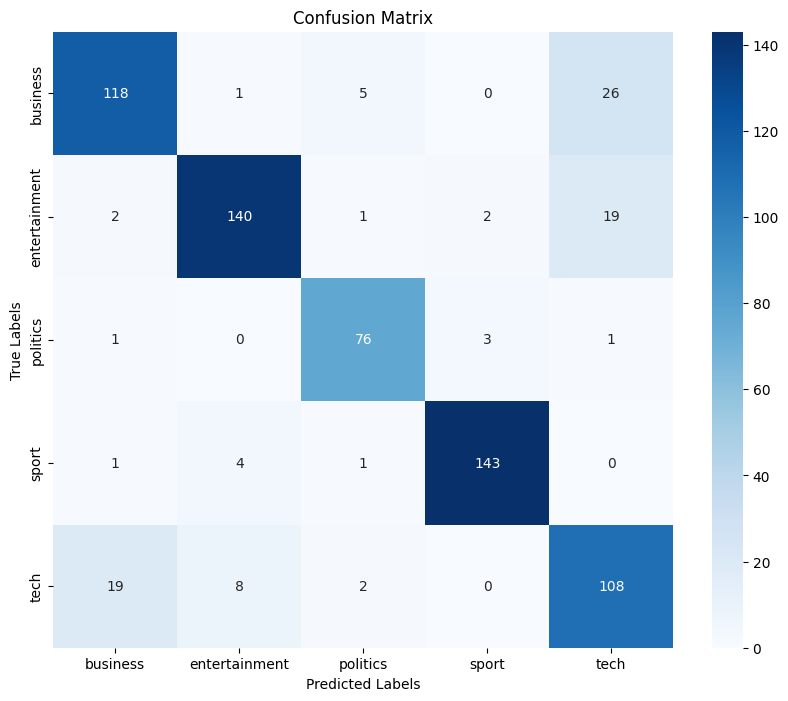

In [105]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define custom labels
labels = ['business',  'entertainment', 'politics','sport', 'tech']

# Make predictions
y_pred = model_simple_rnn.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [130]:
import os
from tensorflow.keras.models import load_model

# Specify the file name for the model
model_filename = 'model_rnn.h5'

# Get the current working directory
current_dir = os.getcwd()

# Construct the full file path
model_path = os.path.join(current_dir, model_filename)

# Save the model
model_simple_rnn.save(model_path)

print("Model saved successfully.")

Model saved successfully.


In [106]:
from keras.layers import GRU
# Model
model_gru = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_len),
    GRU(64),  # GRU layer
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

model_gru.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model_gru.summary())

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_gru.fit(X_train, y_train, epochs=20, verbose=1, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model_gru.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 200, 150)          150000    
_________________________________________________________________
gru_3 (GRU)                  (None, 64)                41472     
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_27 (Dense)             (None, 5)                 325       
Total params: 195,957
Trainable params: 195,957
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
50/50 [==============================] - 3s 31ms/step - loss: 1.5030 - accuracy: 0.3943 - val_loss: 1.0423 - val_accuracy: 0.4853
Epoch 2/20
50/50 [==============================] - 1s 16ms/step - loss: 0.7423 - accuracy: 0.7241 

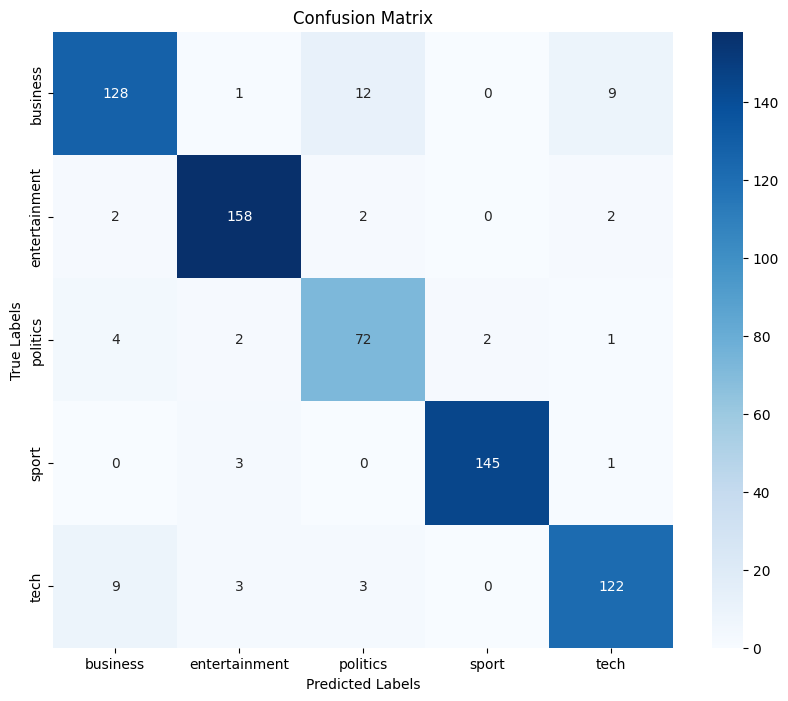

In [107]:
y_pred = model_gru.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [131]:
import os
from tensorflow.keras.models import load_model

# Specify the file name for the model
model_filename = 'model_gru.h5'

# Get the current working directory
current_dir = os.getcwd()

# Construct the full file path
model_path = os.path.join(current_dir, model_filename)

# Save the model
model_gru.save(model_path)

print("Model saved successfully.")

Model saved successfully.


In [108]:
from tensorflow.keras.layers import LSTM

# Model
model_lstm = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_len),
    LSTM(64),  # LSTM layer
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model_lstm.summary())

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_lstm.fit(X_train, y_train, epochs=20, verbose=1, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model_lstm.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 200, 150)          150000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                55040     
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 5)                 325       
Total params: 209,525
Trainable params: 209,525
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
50/50 [==============================] - 3s 28ms/step - loss: 1.3783 - accuracy: 0.4006 - val_loss: 1.0681 - val_accuracy: 0.5044
Epoch 2/20
50/50 [==============================] - 1s 17ms/step - loss: 0.8725 - accuracy: 0.6803 

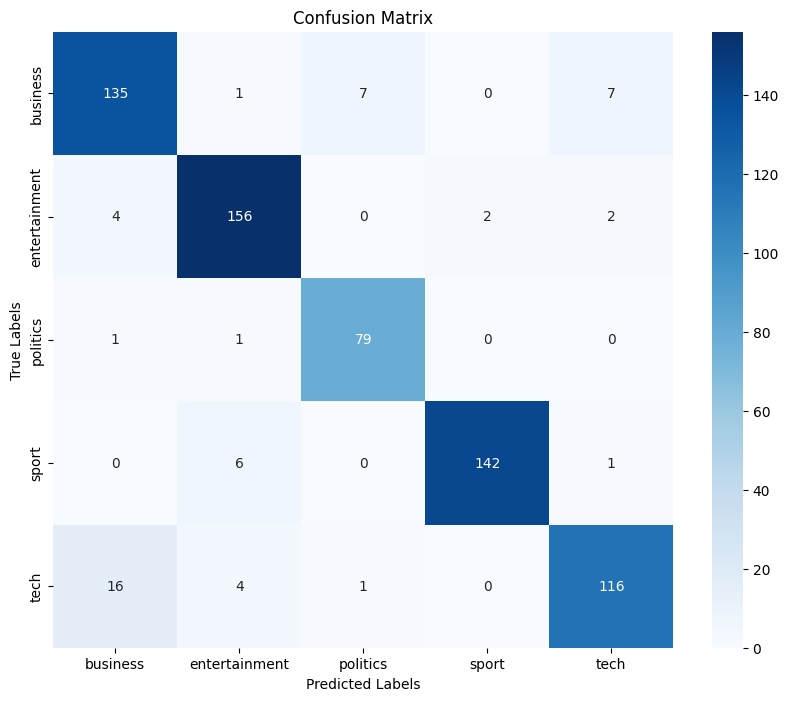

In [109]:
y_pred = model_lstm.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [132]:
import os
from tensorflow.keras.models import load_model

# Specify the file name for the model
model_filename = 'model_lstm.h5'

# Get the current working directory
current_dir = os.getcwd()

# Construct the full file path
model_path = os.path.join(current_dir, model_filename)

# Save the model
model_lstm.save(model_path)

print("Model saved successfully.")

Model saved successfully.


In [ ]:
# import re
 
# def clean_text(string):
#     if isinstance(string, str):
#         clean_text = re.sub(r'[\n,|।\'":]', '', string)
#         return clean_text
#     else:
#         return string # Return the input unchanged if it's not a string

# import snowballstemmer
# import nltk
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords

# # Assuming 'nepali' has stop words list
# stop_words = set(stopwords.words('nepali'))  

# # Create an instance of the Stem class
# # stemmer = Stem()
# stemmer = snowballstemmer.NepaliStemmer()

# def tokenize_and_stem(text):
#     if isinstance(text, str):
#         tokens = word_tokenize(text)
#         tokens = [word for word in tokens if word not in stop_words]
#         stemmed = stemmer.stemWords(tokens)

#         return ' '.join(stemmed)
#     else:
#         return []

# # Applying the tokenization and stemming function to each element in DataFrame 'X'
# X = df['News'].apply(lambda x: tokenize_and_stem(x))

# tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
# tokenizer.fit_on_texts(X)
# word_index = tokenizer.word_index

# sequences = tokenizer.texts_to_sequences(X)
# max_length = max(len(seq) for seq in sequences)
# print('max_length: ', max_length)
# padded_sequences = pad_sequences(sequences, maxlen=max_len, truncating='post')

In [125]:
text ='''
एटीएण्डटीलाई ५७ मिलियन अमेरिकी डलर, भेरिजोनलाई ४७ मिलयन जरिवाना तिर्न भनिएको छ। यस बिच स्प्रिन्ट र टी–मोबाइललाई कुल ९२ मिलियन अमेरिकी डलर जरिवाना लगाइएको छ। स्प्रिन्ट र टी–मोबाइल दुई अघि मर्ज भएका थिए। जसका कारण उनीहरुको जरिवाना धेरै देखिन्छ।

एफसीसीले २०१८ मा उनीहरुका गतिविधिहरू प्रकाशमा आएपछि वाहकहरूको अनाधिकृत खुलासा र ग्राहकहरूको वास्तविक–समय स्थान डाटाको बिक्रीमा गहिरो अनुसन्धान गरेको थियो।

एफसीसी आयुक्त जेसिका रोजेनवर्सेलले भनिन्, क्यारियरहरूले “डाटा एग्रीगेटरहरूलाई वास्तविक–समय स्थान जानकारी बेचे, जसमा अत्यधिक संवेदनशील डाटालाई बेल–बन्ड कम्पनीहरू, बाउन्टी हन्टर र अन्य छायादार अभिनेताहरूको हातमा पुग्यो।’ एजेन्सीका अनुसार, सार्वजनिक रिपोर्टहरू पछि यस योजनाको खुलासा हुन सुरु भएको थियो। मिसौरीका एक शेरिफले सेक्युरस नामको कम्पनीले वायरलेस क्यारियरहरूबाट प्राप्त गरेको स्थान जानकारी प्रयोग गरेर धेरै व्यक्तिहरूलाई ट्र्याक गरिरहेको थियो। सेक्युरसले देशमा सुधारात्मक सुविधाहरूमा सञ्चार सेवाहरू प्रदान गर्ने इनग्याजेडले उल्लेख गरेको छ।

वाहकहरूले अन्ततः आफ्ना गतिविधिहरू बन्द गरेपछि, एजेन्सीले अभ्यास प्रकट भएको र एफसीसीलाई उनीहरूले ग्राहक स्थान डेटा बेच्न बन्द गर्ने वाचा गरेपछि एक वर्षसम्म आफ्ना कार्यक्रमहरू सञ्चालन गर्न जारी राखेको बताए। यसबाहेक, उनीहरूले आफ्ना ग्राहकहरूको जानकारी प्रयोग गरेर वैध सेवाहरू, जस्तै सडक छेउमा सहायता र चिकित्सा आपतकालीन सेवाहरू, वास्तवमा तिनीहरूको स्थानहरू ट्र्याक गर्न प्रयोगकर्ताहरूको सहमति प्राप्त गर्दैछन् भनेर सुनिश्चित गर्न उचित सुरक्षाहरू बिना नै जारी राखे।

कम्पनीहरूले फास्ट कम्पनीलाई भने कि उनीहरू जरिवानालाई चुनौती दिन चाहन्छन्। टी–मोबाइल ८० मिलियन अमेरिकी डलर र स्प्रिन्ट १२ मिलियन जरिवाना लगाइएको कम्पनीले यो अत्याधिक भएको बताएका छन्। एटीएण्डटीले निर्णयमा ‘कानूनी र तथ्यपरक योग्यता दुवैको अभाव’ भएको र यो निर्णयले ‘जीवन बचाउने स्थान सेवाहरूलाई समर्थन गरेकोमा’ (कम्पनीहरूलाई) प्रतकूल रूपमा दण्डित गरिएको छ।’

'''

text_df = pd.Series(text)

In [126]:
text_df=text_df.apply(clean_text)
X = text_df.apply(lambda x: tokenize_and_stem(x))

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(X)
max_length = max(len(seq) for seq in sequences)
print('max_length: ', max_length)
padded_sequences = pad_sequences(sequences, maxlen=max_len, truncating='post')

max_length:  196


In [127]:
prediction = np.argmax(model_simple_rnn.predict(padded_sequences))
labels = ['business',  'entertainment', 'politics','sport', 'tech']
print(labels[prediction])

tech


In [128]:
prediction = np.argmax(model_gru.predict(padded_sequences))
labels = ['business',  'entertainment', 'politics','sport', 'tech']
print(labels[prediction])

business


In [129]:
prediction = np.argmax(model_lstm.predict(padded_sequences))
labels = ['business',  'entertainment', 'politics','sport', 'tech']
print(labels[prediction])

business


In [33]:
# from tensorflow.keras.layers import GRU, Dense, Embedding, Dropout
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the GRU model
# gru_model = Sequential([
#     Embedding(input_dim=X_train.shape[1], output_dim=128, input_length=X_train.shape[1]),
#     GRU(64, return_sequences=True),
#     Dropout(0.5),
#     GRU(32),
#     Dense(64, activation='relu'),
#     Dropout(0.5),
#     Dense(len(set(y)), activation='softmax')
# ])

# # Compile the model
# gru_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Define early stopping criteria
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# # Train the model with early stopping
# history = gru_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# # Evaluate the model
# loss, accuracy = gru_model.evaluate(X_test, y_test)
# print(f'Loss: {loss}, Accuracy: {accuracy}')


Epoch 1/20
57/57 [==============================] - 22s 310ms/step - loss: 1.5990 - accuracy: 0.2238 - val_loss: 1.5901 - val_accuracy: 0.2181
Epoch 2/20
57/57 [==============================] - 17s 300ms/step - loss: 1.5936 - accuracy: 0.2180 - val_loss: 1.5880 - val_accuracy: 0.2214
Epoch 3/20
57/57 [==============================] - 17s 297ms/step - loss: 1.5904 - accuracy: 0.2117 - val_loss: 1.5883 - val_accuracy: 0.2214
Epoch 4/20
57/57 [==============================] - 17s 306ms/step - loss: 1.5907 - accuracy: 0.1996 - val_loss: 1.5855 - val_accuracy: 0.2214
Epoch 5/20
57/57 [==============================] - 17s 301ms/step - loss: 1.5897 - accuracy: 0.2158 - val_loss: 1.5863 - val_accuracy: 0.2214
Epoch 6/20
57/57 [==============================] - 17s 291ms/step - loss: 1.5889 - accuracy: 0.2268 - val_loss: 1.5870 - val_accuracy: 0.2181
Epoch 7/20
29/29 [==============================] - 3s 113ms/step - loss: 1.5855 - accuracy: 0.2214
Loss: 1.5855435132980347, Accuracy: 0.2213

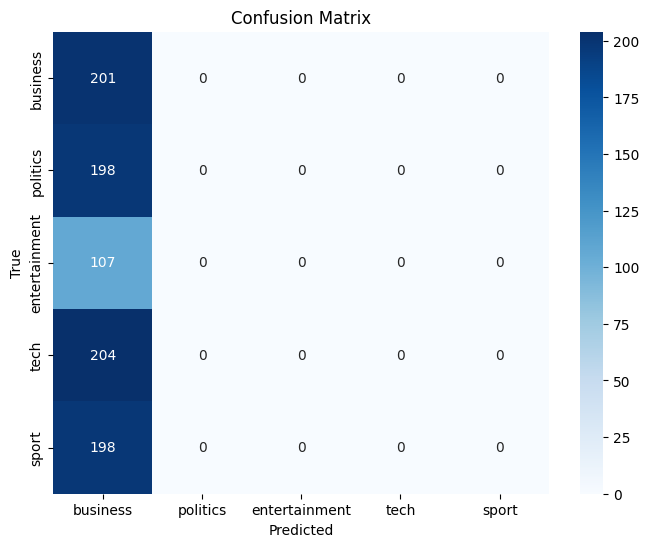

In [34]:
# # Predict probabilities for each class
# y_pred_prob = gru_model.predict(X_test)

# # Get the class with the highest probability for each sample
# y_pred = np.argmax(y_pred_prob, axis=1)

# # Compute the confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# class_names = ['business', 'politics', 'entertainment', 'tech', 'sport']

# # Plot the confusion matrix with class names
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()


In [30]:
# from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the LSTM model
# lstm_model = Sequential([
#     Embedding(input_dim=X_train.shape[1], output_dim=128, input_length=X_train.shape[1]),
#     Bidirectional(LSTM(64, return_sequences=True)),
#     Dropout(0.5),
#     Bidirectional(LSTM(32)),
#     Dense(64, activation='relu'),
#     Dropout(0.5),
#     Dense(len(set(y)), activation='softmax')
# ])

# # Compile the model
# lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Define early stopping criteria
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# # Train the model with early stopping
# history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# # Evaluate the model
# loss, accuracy = lstm_model.evaluate(X_test, y_test)
# print(f'Loss: {loss}, Accuracy: {accuracy}')


NameError: name 'Sequential' is not defined

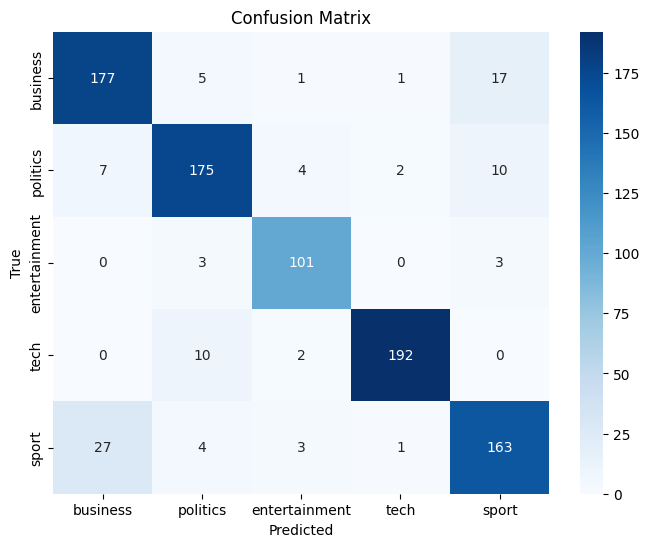

In [36]:
# # Predict probabilities for each class
# y_pred_prob = lstm_model.predict(X_test)

# # Get the class with the highest probability for each sample
# y_pred = np.argmax(y_pred_prob, axis=1)

# # Compute the confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# class_names = ['business', 'politics', 'entertainment', 'tech', 'sport']

# # Plot the confusion matrix with class names
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()


In [82]:
# import os
# from tensorflow.keras.models import load_model

# # Specify the file name for the model
# model_filename = 'my_model.h5'

# # Get the current working directory
# current_dir = os.getcwd()

# # Construct the full file path
# model_path = os.path.join(current_dir, model_filename)

# # Save the model
# model.save(model_path)

# print("Model saved successfully.")


Model saved successfully.


In [38]:
# def clean_text(string):
#     if isinstance(string, str):
#         clean_text = re.sub(r'[\n,|।\'":]', '', string)
#         return clean_text
#     else:
#         return string  # Return the input unchanged if it's not a string


# import nltk
# from nltk.tokenize import word_tokenize
# from stem import Stem  # Import the Stem class from stem.py
# import nltk
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords

# # Assuming 'nepali' has stop words list
# stop_words = set(stopwords.words('nepali'))  

# # Create an instance of the Stem class
# stemmer = Stem()

# def tokenize_and_stem(text):
#     if isinstance(text, str):
#         tokens = word_tokenize(text)
#         tokens = [word for word in tokens if word not in stop_words]
#         stemmed_tokens = stemmer.rootify(tokens)  # Use the rootify method of the Stem class
#         return stemmed_tokens
#     else:
#         return []

# # Applying the tokenization and stemming function to each element in DataFrame 'X'
# X = X.apply(lambda x: tokenize_and_stem(x))


# import numpy as np
# from keras.preprocessing.sequence import pad_sequences
# from sklearn.model_selection import train_test_split

# # Flatten the data to get a list of all words
# all_words = [word for sentence in X for word in sentence]

# # Count the frequency of each word
# word_counts = pd.Series(all_words).value_counts()

# # Assign ranks to the words based on their frequency
# word_ranks = word_counts.rank(ascending=False, method='min')

# # Create a dictionary to map words to their ranks
# word_rank_dict = dict(zip(word_counts.index, word_ranks))

# # Convert sentences to sequences of word indices
# word_indices = [[word_rank_dict[word] for word in sentence if word in word_rank_dict] for sentence in X]

# # Padding sequences to ensure they all have the same length
# max_length = max(len(seq) for seq in word_indices)
# padded_sequences = pad_sequences(word_indices, maxlen=max_length, padding='post', truncating='post')

# # Convert the list of lists to a numpy array
# X = np.array(padded_sequences)

NameError: name 'preprocess_input_data' is not defined

In [75]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [90]:
# rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# rnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# # Compile and train the LSTM model
# lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# lstm_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# # Compile and train the GRU model
# gru_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# gru_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

In [ ]:
# from nepalitokenizers import WordPiece

# tokenizer = WordPiece()

# def tokenize_1(text):
#     tokens = tokenizer.encode(text)
#     return tokens.tokens

In [ ]:
# tokens = X_train.apply(tokenize_1)
# print(tokens)

In [ ]:
# X_train = tokens

In [ ]:
# from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# # Define the TextVectorization layer
# vectorizer = TextVectorization(max_tokens=1000, output_mode='int')

# # Adapt the TextVectorization layer to your text data
# vectorizer.adapt(text_data)

# # Preprocess your input text data
# preprocessed_data = vectorizer(text_data)

# # Now you can feed the preprocessed_data into your model for prediction

In [ ]:
# from nepali_stemmer.stemmer import NepStemmer
# nepstem = NepStemmer()

In [ ]:
# y=df.Category

In [ ]:
# X=df.News

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['Category'], test_size=0.2, random_state=42)

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# print("Data type of y_train:", type(y_train))
# print("Data type of y_test:", type(y_test))


# print("Categories before label encoding in y_train:")
# print(set(y_train))

# print("Categories before label encoding in y_train:")
# print(set(y_test))

# # Encode the categorical labels into numerical format
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# print("Categories after label encoding in y_test:")
# print(set(y_train_encoded))

# print("Categories after label encoding in y_test:")
# print(set(y_test_encoded))

# print("Data type of y_train:", type(y_train))
# print("Data type of y_test:", type(y_test))

# print("Unique values in y_train_encoded:", set(y_train_encoded))
# print("Unique values in y_test_encoded:", set(y_test_encoded))


In [ ]:
# import re
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Define a regex pattern to preserve Devanagari characters
# devanagari_pattern = re.compile(r'[^a-zA-Z\s\u0900-\u097F]')  # Unicode range for Devanagari characters

# # Remove special characters and lowercasing while preserving Devanagari characters
# df['News'] = df['News'].apply(lambda x: devanagari_pattern.sub('', x.lower()))

# # Tokenization
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(df['News'])
# word_index = tokenizer.word_index
# print("Number of unique tokens:", len(word_index))

# # Padding sequences
# max_length = 100  # Adjust as needed based on the length distribution analysis
# sequences = tokenizer.texts_to_sequences(df['News'])
# padded_sequences = pad_sequences(sequences, maxlen=max_length)


In [ ]:
# import numpy as np
# from nltk.tokenize import word_tokenize
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences

# sequences = tokenizer.texts_to_sequences(X_train)
# # Pad sequences to ensure uniform length
# max_sequence_length = max(len(seq) for seq in sequences)
# padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

In [137]:
item_list=[एटीएण्डटीलाई ५७ मिलियन अमेरिकी डलर, भेरिजोनलाई ४७ मिलयन जरिवाना तिर्न भनिएको छ। यस बिच स्प्रिन्ट र टी–मोबाइललाई कुल ९२ मिलियन अमेरिकी डलर जरिवाना लगाइएको छ। स्प्रिन्ट र टी–मोबाइल दुई अघि मर्ज भएका थिए। जसका कारण उनीहरुको जरिवाना धेरै देखिन्छ।
]

for item in item_list:
    # Clean text
        text_df = pd.Series(item)
        text_df = text_df.apply(clean_text)
        X = text_df.apply(lambda x: tokenize_and_stem(x))

        sequences = tokenizer.texts_to_sequences(X)
        padded_sequences = pad_sequences(sequences, maxlen=max_length)

        prediction_rnn = np.argmax(model_simple_rnn.predict(padded_sequences))
        labels = ['business',  'entertainment', 'politics', 'sport', 'tech']
        predicted_label_rnn = labels[prediction_rnn]

        prediction_gru = np.argmax(model_gru.predict(padded_sequences))
        predicted_label_gru = labels[prediction_gru]

        prediction_lstm = np.argmax(model_lstm.predict(padded_sequences))
        predicted_label_lstm = labels[prediction_lstm]

        
        return {"predicted_label_rnn": predicted_label_rnn,
                "predicted_label_gru": predicted_label_gru,
                "predicted_label_lstm": predicted_label_lstm
                }

SyntaxError: invalid character '५' (U+096B) (3326885300.py, line 1)